### Problem Statement
## Forecast the CocaCola prices.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## Data Exploration.

### Converting the Quarters into Years

In [19]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
df.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


### Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)

In [20]:
# converting into datetime formate as the index was not in correct formate.
df['Date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


### Extracting the Quarters and putting in column

In [21]:
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]
    
df.head(10)

C:\Users\sampa\AppData\Local\Temp\ipykernel_19276\1952454056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i] = n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


### Creating Dummy Variables for Quarters Variable

In [22]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

df1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


### Dropping all the unnecessary column

In [23]:
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


### Making the Date as DateTime index for the Dataframe

In [24]:
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [25]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


### Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [26]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


## Data Visualization

<Axes: xlabel='month', ylabel='year'>

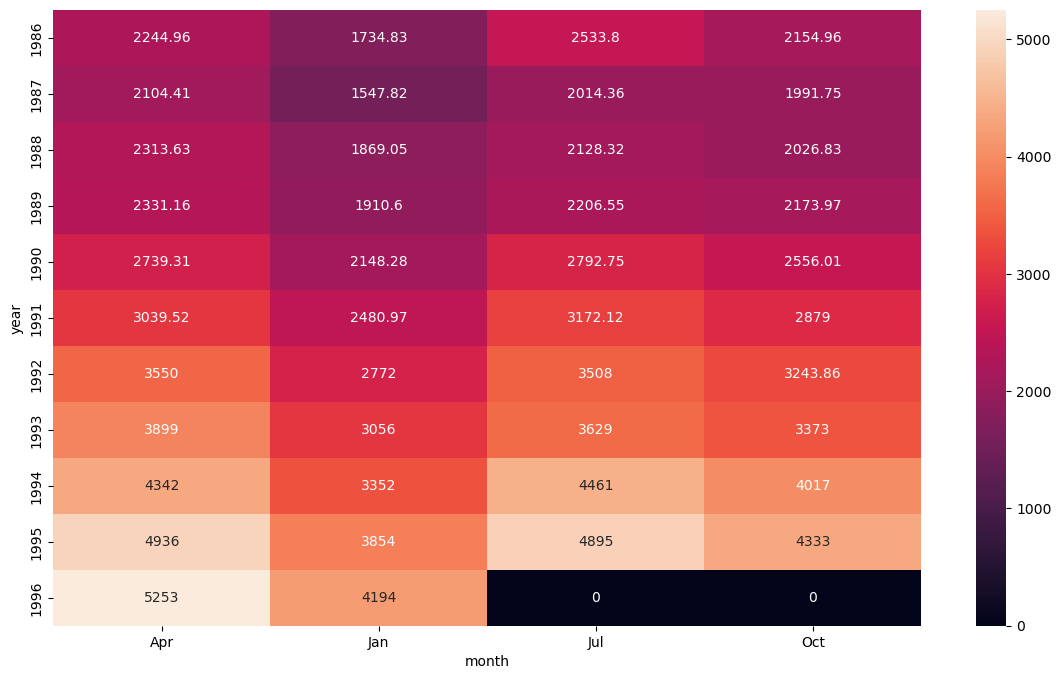

In [27]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

### Line Plot

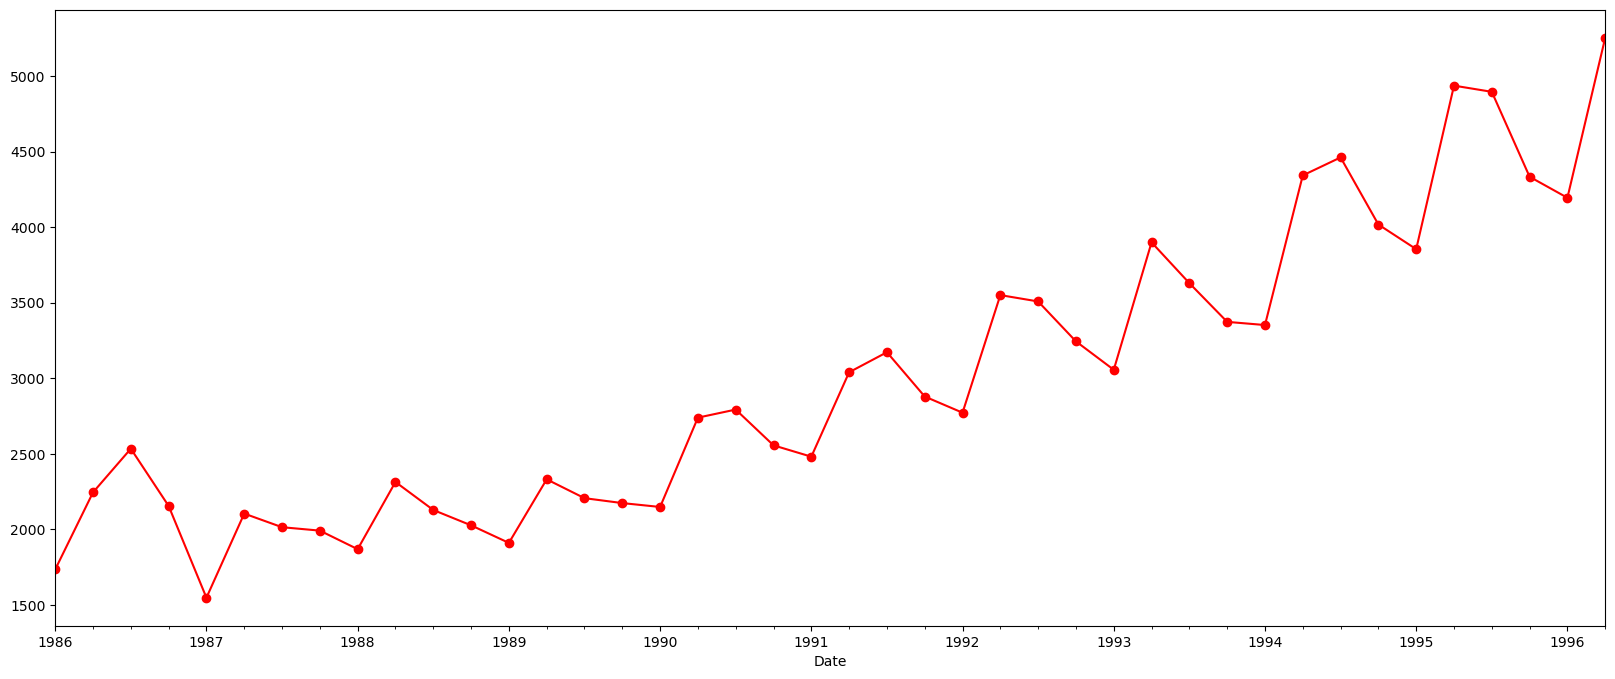

In [28]:
df1['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

### Box Plot of Each Year by Quaterly Intervals

<Axes: xlabel='year', ylabel='Sales'>

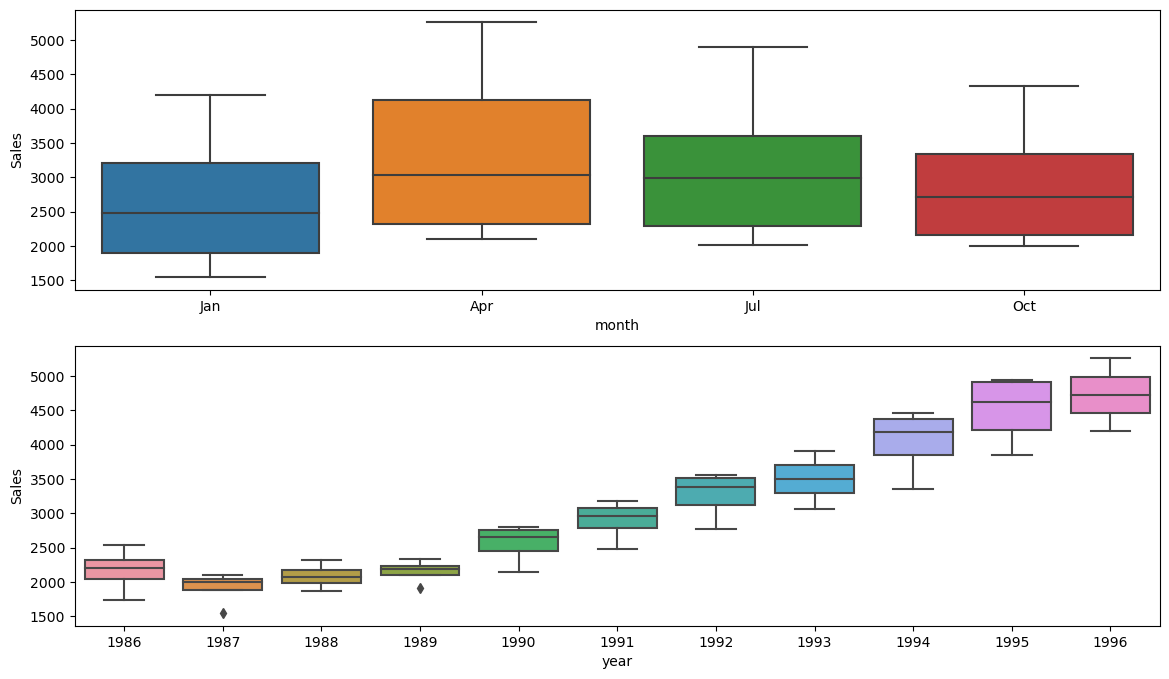

In [30]:
# Boxplot for every year

plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

### Histogram and Density Plots

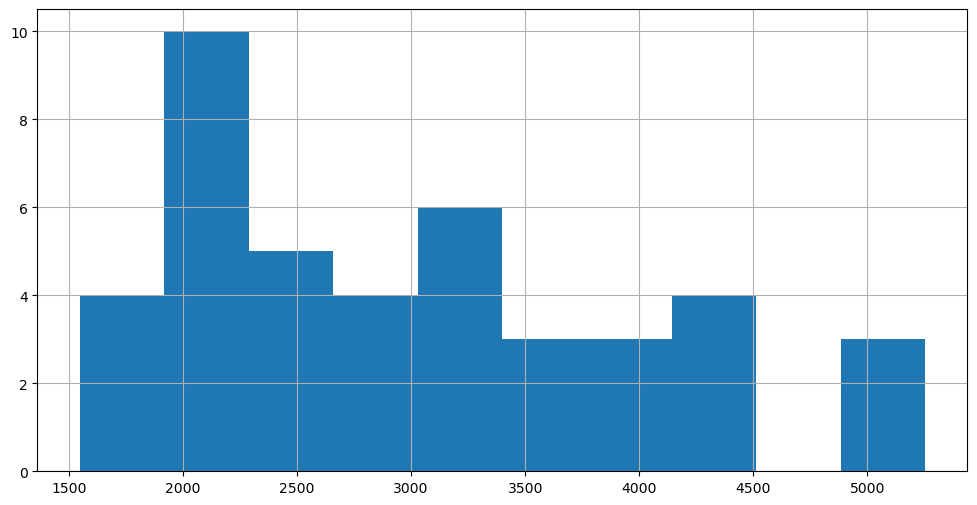

In [31]:
df.Sales.hist(figsize=(12,6))
plt.show()

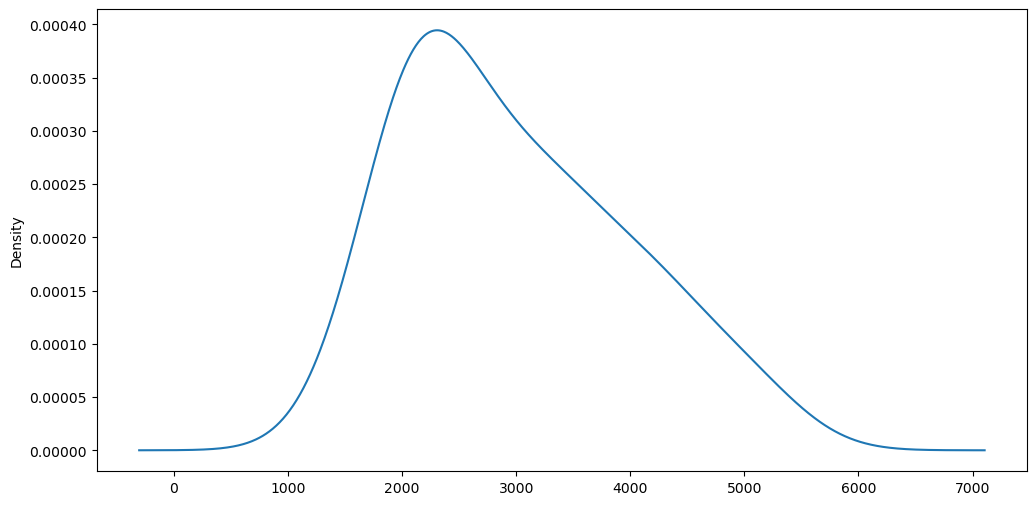

In [32]:
# create a density plot
df.Sales.plot(kind='kde', figsize=(12,6))
plt.show()

In [33]:
cc = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [34]:
q = ['Q1','Q2','Q3','Q4']

In [35]:
n = cc['Quarter'][0] # Taking the String Q1_86
n[0:2]# Slicing the string to get Q1
cc['q']=0 # creating a new column to enter only the Quarters

In [36]:
cc.head()

,Quarter,Sales,q
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0


In [37]:
cc.shape

(42, 3)

In [38]:
for i in range(42):
    n=cc['Quarter'][i]
    cc['q'][i]=n[0:2]

C:\Users\sampa\AppData\Local\Temp\ipykernel_19276\415663338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['q'][i]=n[0:2]


In [39]:
dummy=pd.DataFrame(pd.get_dummies(cc['q']))
df1=pd.concat((cc,dummy),axis=1)
df1

,Quarter,Sales,q,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [40]:
t= np.arange(1,43)
df1['t']=t
df1['t_square']=df1['t']*df1['t']

In [41]:
log_Sales=np.log(df1['Sales'])
df1['log_Sales']=log_Sales

In [42]:
df1.sample(3)

,Quarter,Sales,q,Q1,Q2,Q3,Q4,t,t_square,log_Sales
24,Q1_92,2772.0,Q1,1,0,0,0,25,625,7.927324
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555
26,Q3_92,3508.0,Q3,0,0,1,0,27,729,8.162801


<Axes: >

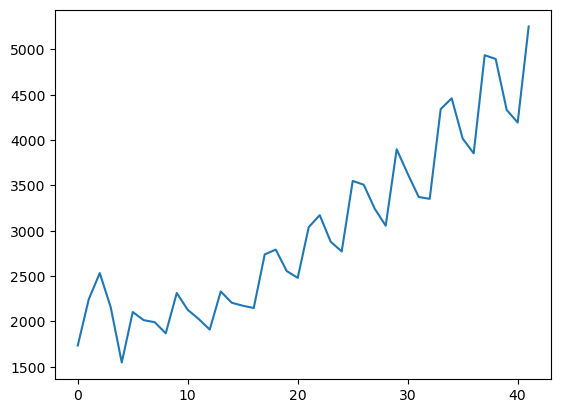

In [43]:
df1.Sales.plot()

In [44]:
Train=df1.head(38)
Test=df1.tail(4)

In [45]:
import statsmodels.formula.api as smf

linear= smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022813

In [46]:
quad=smf.ols('Sales~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predquad))**2))
rmsequad

475.561835183161

In [47]:
expo=smf.ols('log_Sales~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672005

In [48]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547278

In [49]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.9829023982247

In [50]:
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719348884

In [51]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779759

In [52]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439049825708

In [53]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187961471

In [60]:
Table={'Model':pd.Series(['rmselin','rmsequad','rmseexpo','rmseadd','rmseaddlinear','rmseaddquad','rmsemul','rmsemulin','rmse_mul_quad']),'Values':pd.Series([rmselin,rmsequad,rmseexpo,rmseadd,rmseaddlinear,rmseaddquad,rmsemul,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table

,Model,Values
0,rmselin,421.178788
1,rmsequad,475.561835
2,rmseexpo,466.247973
3,rmseadd,1860.023815
4,rmseaddlinear,464.982902
5,rmseaddquad,301.738007
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmse_mul_quad,581.845719


In [65]:
df1.to_excel('PREDICT_CC_DATA.xlsx')

In [66]:
pred=pd.read_excel('PREDICT_CC_DATA.xlsx')

In [67]:
final_pred= smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=df1).fit()

In [68]:
pred_new = pd.Series(addquad.predict(pred))
pred_new

0     1684.668339
1     2288.302788
2     2194.350819
3     1903.238197
4     1684.796206
5     2304.832977
6     2227.283330
7     1952.573030
8     1750.533361
9     2386.972454
10    2325.825129
11    2067.517151
12    1881.879804
13    2534.721219
14    2489.976216
15    2248.070560
16    2078.835535
17    2748.079273
18    2719.736592
19    2494.233258
20    2341.400555
21    3027.046615
22    3015.106256
23    2806.005244
24    2669.574864
25    3371.623246
26    3376.085209
27    3183.386519
28    3063.358461
29    3781.809165
30    3802.673450
31    3626.377082
32    3522.751346
33    4257.604372
34    4294.870980
35    4134.976934
36    4047.753520
37    4799.008868
38    4852.677797
39    4709.186074
40    4638.364982
41    5406.022652
dtype: float64

In [70]:
pred["forecasted_sales"] = (pd.Series(pred_new))

pred

,Unnamed: 0,Quarter,Sales,q,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_sales
0,0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1684.668339
1,1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,2288.302788
2,2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,2194.350819
3,3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1903.238197
4,4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1684.796206
5,5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2304.832977
6,6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2227.283330
7,7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1952.573030
8,8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1750.533361
9,9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2386.972454


In [71]:
addquad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           7.74e-23
Time:                        19:13:29   Log-Likelihood:                -244.13
No. Observations:                  38   AIC:                             500.3
Df Residuals:                      32   BIC:                             510.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1626.3498     67.204     24.200      0.000    1489.460    1763.240
t            -12.2698      9.939     -1.235      0.226     -32.515       7.975
t_square       2.0503      0.247      8.292      0.000       1.547       2.554
Q1            68.5380     46.857      1.463      0.153     -26.907     163.983
Q2           678.2913     47.337     14.329      0.000     581.868     774.715
Q3           586.3577     50.333     11.650      0.000     483.833     688.882
Q4           293.1628     50.780      5.773      0.000     189.727     396.598
==============================================================================
Omnibus:                        1.116   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.919
Skew:                          -0.095   Prob(JB):                        0.632
Kurtosis:                       2.262   Cond. No.                     3.64e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

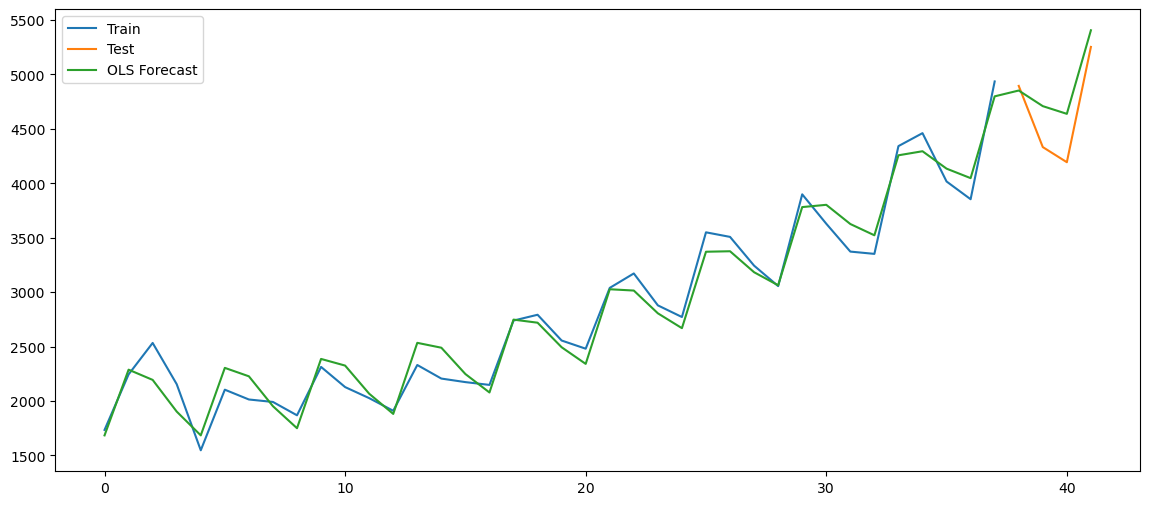

In [73]:
plt.figure(figsize=(14,6))
plt.plot(Train['Sales'], label='Train')
plt.plot(Test['Sales'], label='Test')
plt.plot((pd.Series(pred_new)), label='OLS Forecast')
plt.legend(loc='best')
plt.show()

### We have built a model that approximately matches the sales to cocacola, Hence we can use the same for future prediction.

## The coke sales is following additive quadratic seasonality.